#### [과제1] 타이타닉
    - 생낮낮중 성별 비율 시각화
    - 나이별 생존자의 성별비율 비교 시각화
    - 하나의 Figure에 모두표시

In [128]:
import pandas as pd
from matplotlib import pyplot as plt 
from Utils import def_util as util

In [129]:
util.font_add('malgun')

In [130]:
filename = r'DATA\titanic.csv'

In [131]:
titanicFD = pd.read_csv(filename)
titanicFD.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   survived     891 non-null    int64  
 1   pclass       891 non-null    int64  
 2   sex          891 non-null    object 
 3   age          714 non-null    float64
 4   sibsp        891 non-null    int64  
 5   parch        891 non-null    int64  
 6   fare         891 non-null    float64
 7   embarked     889 non-null    object 
 8   class        891 non-null    object 
 9   who          891 non-null    object 
 10  adult_male   891 non-null    bool   
 11  deck         203 non-null    object 
 12  embark_town  889 non-null    object 
 13  alive        891 non-null    object 
 14  alone        891 non-null    bool   
dtypes: bool(2), float64(2), int64(4), object(7)
memory usage: 92.4+ KB


In [132]:
titanicSexSurvivedFD = titanicFD[['sex','survived','age']]
titanicSexSurvivedFD.isna().sum()
titanicSexSurvivedFD = titanicSexSurvivedFD.dropna()

In [133]:
titanicSexSurvivedFD['age'] = titanicSexSurvivedFD['age'].astype('int64')

In [134]:
koreanS = {'male':'남','female':'여'}
titanicSexSurvivedFD['age'] = (titanicSexSurvivedFD['age'] // 10) * 10
titanicSexSurvivedFD['sex'] = titanicSexSurvivedFD['sex'].str.replace('female','여')
titanicSexSurvivedFD['sex'] = titanicSexSurvivedFD['sex'].str.replace('male','남')

In [135]:
titanicSexSurvivedFD = titanicSexSurvivedFD.set_index(['sex','age'])

In [136]:
titanicSexSurvivedFD.index

MultiIndex([('남', 20),
            ('여', 30),
            ('여', 20),
            ('여', 30),
            ('남', 30),
            ('남', 50),
            ('남',  0),
            ('여', 20),
            ('여', 10),
            ('여',  0),
            ...
            ('여', 20),
            ('남', 30),
            ('여', 20),
            ('남', 20),
            ('남', 20),
            ('여', 30),
            ('남', 20),
            ('여', 10),
            ('남', 20),
            ('남', 30)],
           names=['sex', 'age'], length=714)

In [137]:
titanicGruopFD = titanicSexSurvivedFD.groupby(['sex','age']).sum()
titanicGruopFD

survived
sex age          
남   0          19
    10          7
    20         25
    30         23
    40         12
    50          4
    60          2
    70          0
    80          1
여   0          19
    10         34
    20         52
    30         50
    40         22
    50         16
    60          4

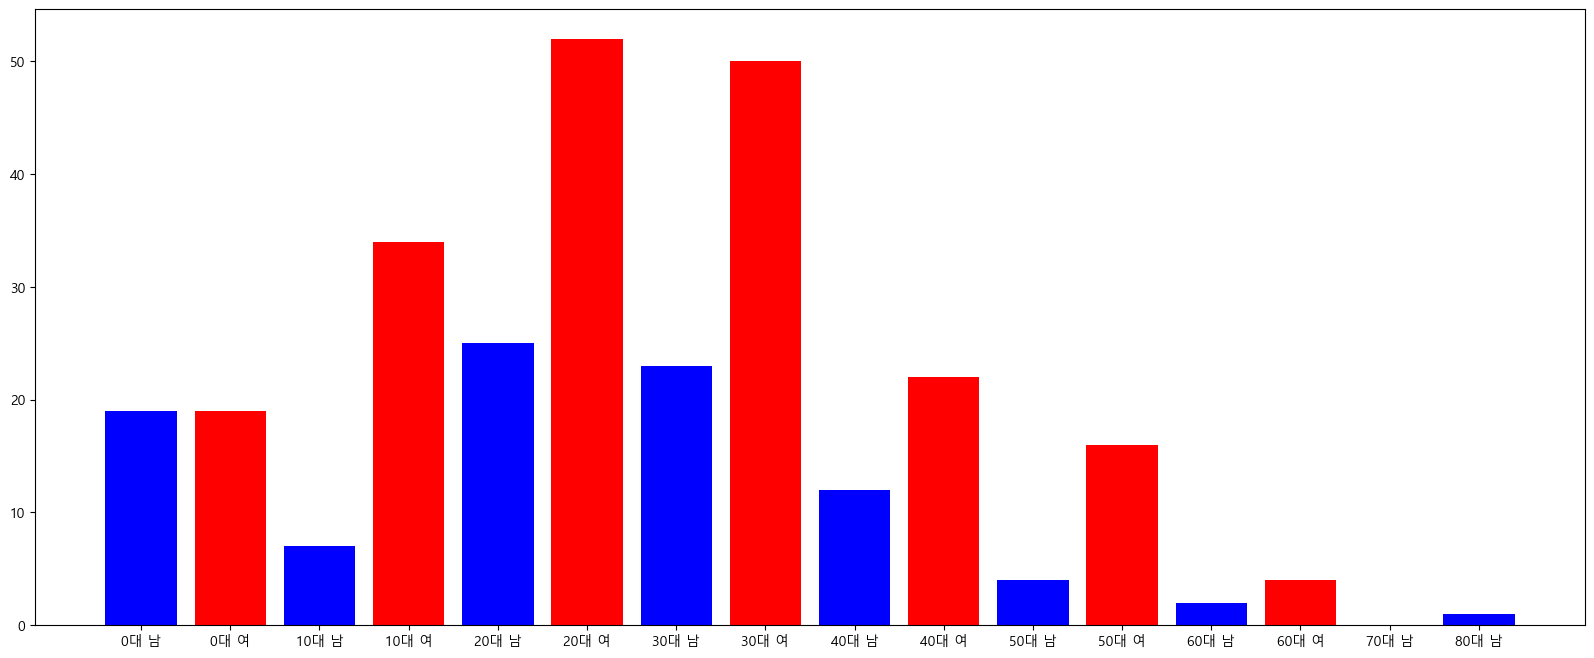

In [138]:
plt.figure(figsize=(20,8))

for age in titanicGruopFD.loc['남'].index:
    plt.bar(f'{age}대 남', height = titanicGruopFD.loc[('남',age)], color='blue')
    if ('여',age) in titanicGruopFD.index:
        plt.bar(f'{age}대 여', height = titanicGruopFD.loc[('여',age)], color='red')

#### [과제2] 시도별 전출입 인구수
    - 1970 ~ 2017년 이동 인구수
    - 대구 ===> 타지역으로 이동 인구수 분석 및 시각화 [지역, 인구수]
    - 전국으로 봤을 때 가장 많이 발생한 지역 [지역, 인구수]

In [139]:
filename = r'DATA\시도별 전출입 인구수.xlsx'

In [140]:
cityFD = pd.read_excel(filename)
cityFD.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 325 entries, 0 to 324
Data columns (total 50 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   전출지별    18 non-null     object
 1   전입지별    324 non-null    object
 2   1970    325 non-null    object
 3   1971    325 non-null    object
 4   1972    325 non-null    object
 5   1973    325 non-null    object
 6   1974    325 non-null    object
 7   1975    325 non-null    object
 8   1976    325 non-null    object
 9   1977    325 non-null    object
 10  1978    325 non-null    object
 11  1979    325 non-null    object
 12  1980    325 non-null    object
 13  1981    325 non-null    object
 14  1982    325 non-null    object
 15  1983    325 non-null    object
 16  1984    322 non-null    object
 17  1985    322 non-null    object
 18  1986    322 non-null    object
 19  1987    325 non-null    object
 20  1988    325 non-null    object
 21  1989    325 non-null    object
 22  1990    325 non-null    ob

In [142]:
cityFD.head()

,전출지별,전입지별,1970,1971,1972,1973,1974,1975,1976,1977,...,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017
0,NaN,NaN,이동자수 (명),이동자수 (명),이동자수 (명),이동자수 (명),이동자수 (명),이동자수 (명),이동자수 (명),이동자수 (명),...,이동자수 (명),이동자수 (명),이동자수 (명),이동자수 (명),이동자수 (명),이동자수 (명),이동자수 (명),이동자수 (명),이동자수 (명),이동자수 (명)
1,전국,전국,4046536,4210164,3687938,4860418,5297969,9011440,6773250,7397623,...,8808256,8487275,8226594,8127195,7506691,7411784,7629098,7755286,7378430,7154226
2,NaN,서울특별시,1742813,1671705,1349333,1831858,2050392,3396662,2756510,2893403,...,2025358,1873188,1733015,1721748,1555281,1520090,1573594,1589431,1515602,1472937
3,NaN,부산광역시,448577,389797,362202,482061,680984,805979,724664,785117,...,514502,519310,519334,508043,461042,478451,485710,507031,459015,439073
4,NaN,대구광역시,-,-,-,-,-,-,-,-,...,409938,398626,370817,370563,348642,351873,350213,351424,328228,321182


In [144]:
cityFD = cityFD.drop(index=0)

In [146]:
cityFD.isna().sum()

전출지별    306
전입지별      0
1970      0
1971      0
1972      0
1973      0
1974      0
1975      0
1976      0
1977      0
1978      0
1979      0
1980      0
1981      0
1982      0
1983      0
1984      3
1985      3
1986      3
1987      0
1988      0
1989      0
1990      0
1991      0
1992      0
1993      0
1994      0
1995      0
1996      0
1997      0
1998      0
1999      0
2000      0
2001      0
2002      0
2003      0
2004      0
2005      0
2006      0
2007      0
2008      0
2009      0
2010      0
2011      0
2012      0
2013      0
2014      0
2015      0
2016      0
2017      0
dtype: int64

In [151]:
cityFD['전출지별']=cityFD['전출지별'].ffill()
cityFD = cityFD.dropna()
cityFD.isna().sum()

전출지별    0
전입지별    0
1970    0
1971    0
1972    0
1973    0
1974    0
1975    0
1976    0
1977    0
1978    0
1979    0
1980    0
1981    0
1982    0
1983    0
1984    0
1985    0
1986    0
1987    0
1988    0
1989    0
1990    0
1991    0
1992    0
1993    0
1994    0
1995    0
1996    0
1997    0
1998    0
1999    0
2000    0
2001    0
2002    0
2003    0
2004    0
2005    0
2006    0
2007    0
2008    0
2009    0
2010    0
2011    0
2012    0
2013    0
2014    0
2015    0
2016    0
2017    0
dtype: int64

In [165]:
cityFD = cityFD.set_index(['전출지별','전입지별'])

In [155]:
cityFD.value_counts()

전출지별     전입지별     1970    1971    1972    1973    1974    1975    1976    1977    1978    1979    1980    1981    1982    1983    1984    1985    1986    1987    1988    1989    1990    1991    1992    1993    1994    1995    1996    1997    1998    1999    2000    2001    2002    2003    2004    2005    2006    2007    2008    2009    2010    2011    2012    2013    2014    2015    2016    2017  
강원도      강원도      113485  128222  112559  180716  130356  212434  154239  162520  170661  151052  186495  175961  179155  205866  185322  174284  174443  175327  172443  173953  167644  173466  161850  159416  163492  184202  158515  168235  171176  183780  171050  169491  182229  181717  167246  165077  170234  158066  161854  158826  153165  147142  140649  136041  145250  140018  140921  130963    1
세종특별자치시  경상남도     -       -       -       -       -       -       -       -       -       -       -       -       -       -       -       -       -       -       -       -       -       -      

In [169]:
cityFD = cityFD[cityFD.columns].replace('-','0')
cityFD = cityFD.astype('int64')
cityFD.info()

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 321 entries, ('전국', '전국') to ('제주특별자치도', '제주특별자치도')
Data columns (total 48 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   1970    321 non-null    int64
 1   1971    321 non-null    int64
 2   1972    321 non-null    int64
 3   1973    321 non-null    int64
 4   1974    321 non-null    int64
 5   1975    321 non-null    int64
 6   1976    321 non-null    int64
 7   1977    321 non-null    int64
 8   1978    321 non-null    int64
 9   1979    321 non-null    int64
 10  1980    321 non-null    int64
 11  1981    321 non-null    int64
 12  1982    321 non-null    int64
 13  1983    321 non-null    int64
 14  1984    321 non-null    int64
 15  1985    321 non-null    int64
 16  1986    321 non-null    int64
 17  1987    321 non-null    int64
 18  1988    321 non-null    int64
 19  1989    321 non-null    int64
 20  1990    321 non-null    int64
 21  1991    321 non-null    int64
 22  1992    321 non-null

In [175]:
cityFD.head(5)
daeguCityFD = cityFD.loc['대구광역시']
daeguCityFD.head()

,1970,1971,1972,1973,1974,1975,1976,1977,1978,1979,...,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017
전입지별,,,,,,,,,,,,,,,,,,,,,
전국,0,0,0,0,0,0,0,0,0,0,...,422676,411288,382657,383310,359206,363224,365739,364364,337488,333118
서울특별시,0,0,0,0,0,0,0,0,0,0,...,14824,15469,13915,13310,13838,13673,13735,13038,12802,13011
부산광역시,0,0,0,0,0,0,0,0,0,0,...,5066,5207,5050,4906,5216,5543,6157,5182,4860,4840
대구광역시,0,0,0,0,0,0,0,0,0,0,...,311113,298755,274649,276495,254661,258107,252642,259185,240722,236143
인천광역시,0,0,0,0,0,0,0,0,0,0,...,2125,2003,1968,2000,1979,2202,2015,1987,1962,1930


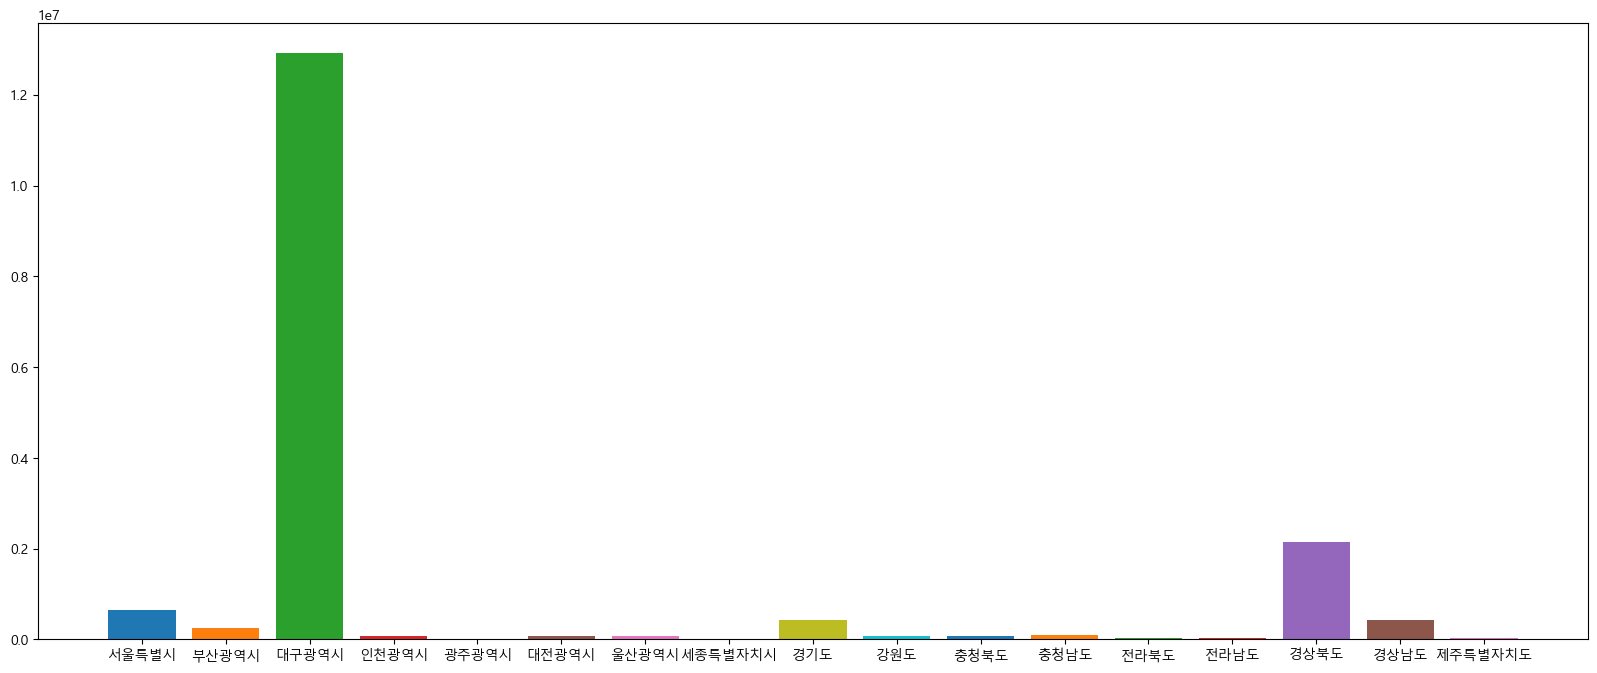

In [218]:
citySum = daeguCityFD.iloc[1:].T.sum().to_dict()
plt.figure(figsize=(20,8))
for idx, val in citySum.items():
    plt.bar(idx, height=val)
plt.show()

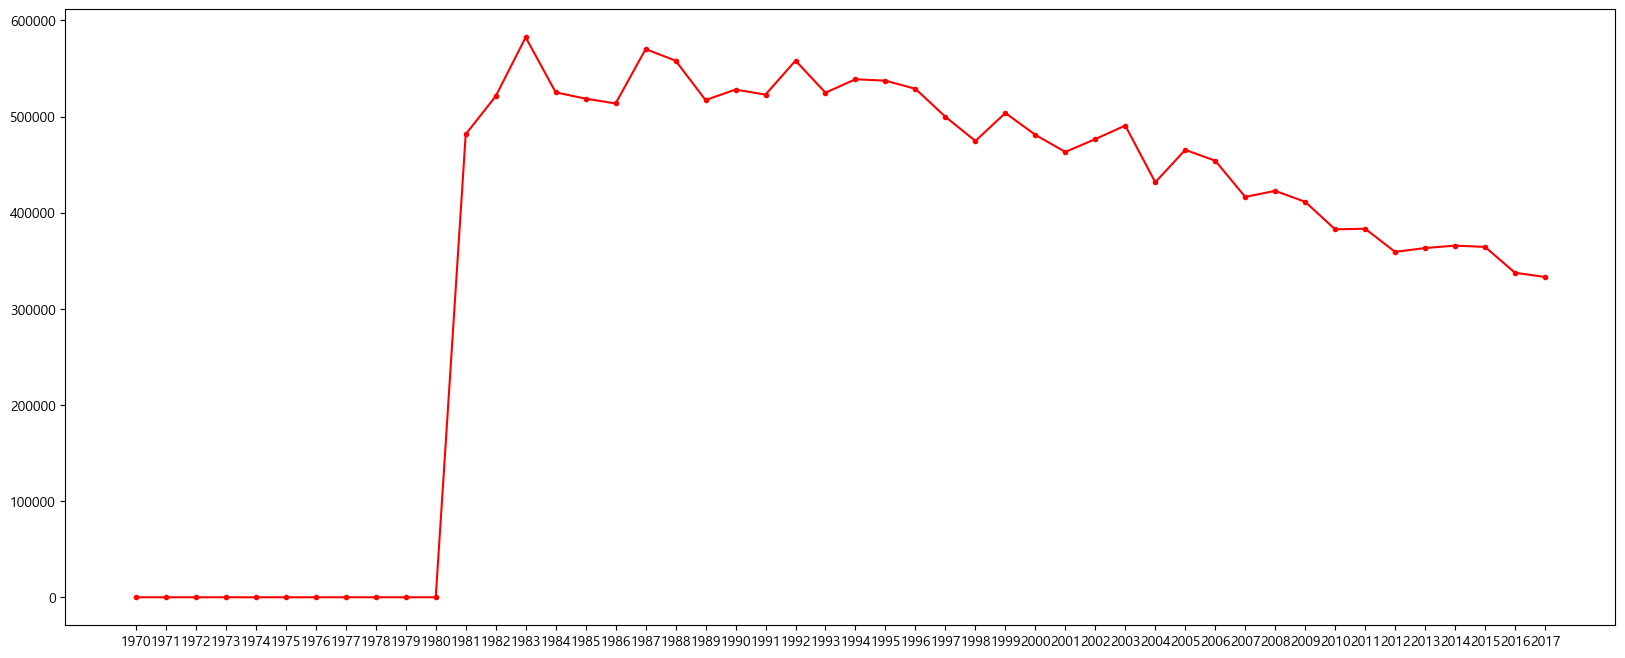

In [219]:
citySR = daeguCityFD.iloc[1:].sum()
plt.figure(figsize=(20,8))
plt.plot(citySR.index,citySR.values, 'r.-', label="인구수 변화 그래프" )
plt.show()

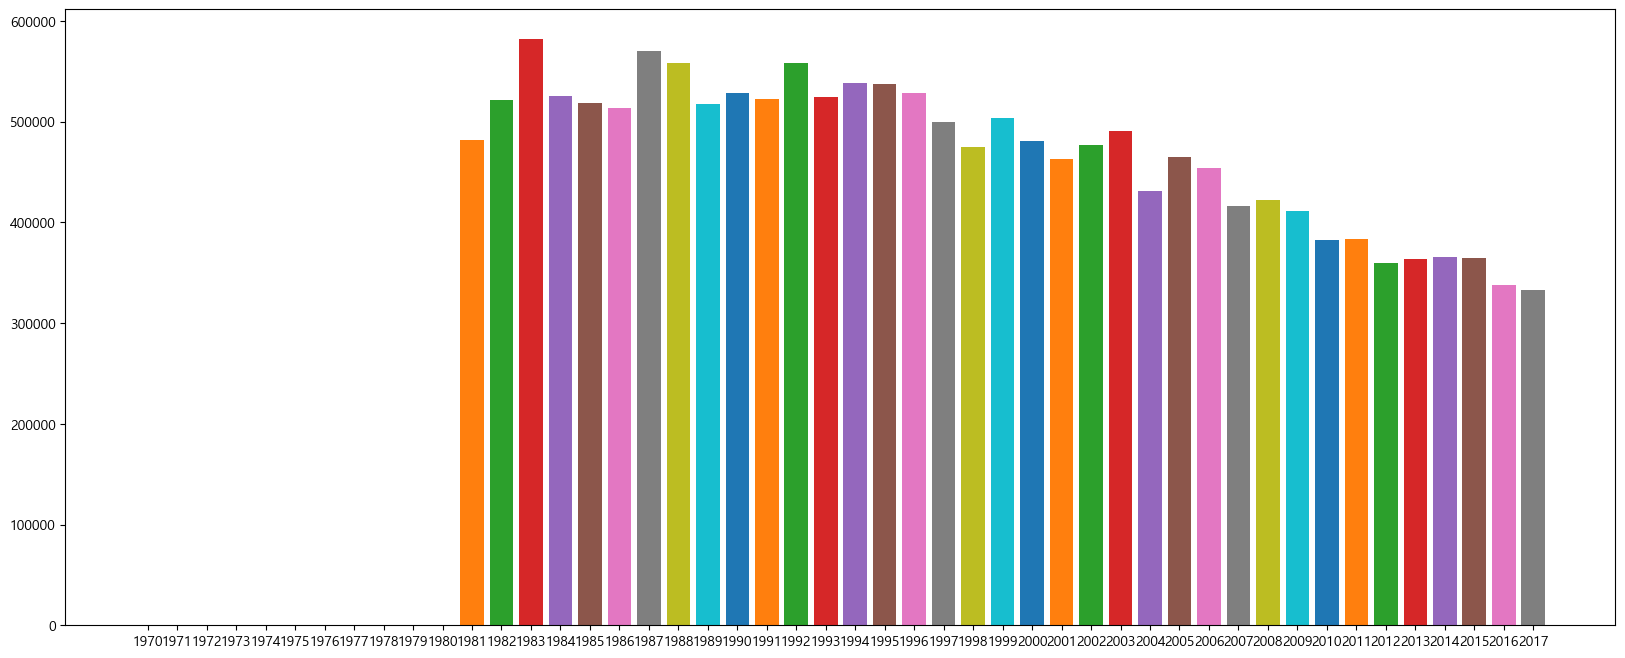

In [223]:
citySum = daeguCityFD.iloc[0].to_dict()
plt.figure(figsize=(20,8))
for idx, val in citySum.items():
    plt.bar(idx, height=val)
plt.show()

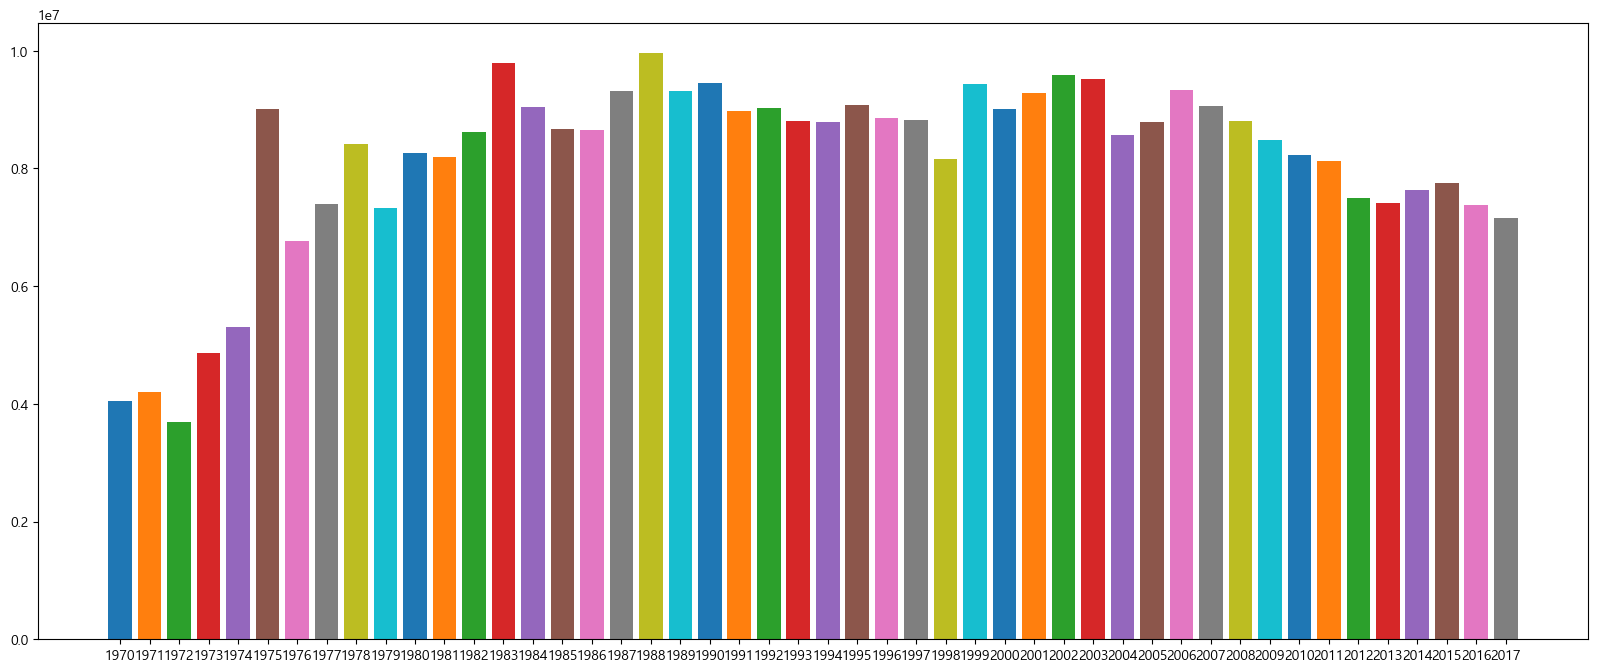

In [231]:
citySum = cityFD.iloc[0].to_dict()
plt.figure(figsize=(20,8))
for idx, val in citySum.items():
    plt.bar(idx, height=val)
plt.show()

In [ ]:
## 타 지역에서 본인 지역으로 온 수 - 본인 지역을 제외한 나머지 지역에 전출낸 수 

In [263]:
cityFD2 = cityFD.T.sum()
# cityFD2.loc[cityFD2.index[1:]]
allCitySR = cityFD2.loc['전국'][1:]
allCitySR

전입지별
서울특별시      109885155
부산광역시       31531929
대구광역시       17346829
인천광역시       17565815
광주광역시        9156002
대전광역시        8073781
울산광역시        3561967
세종특별자치시       344234
경기도         75242949
강원도         11866760
충청북도        10278784
충청남도        14980568
전라북도        14521353
전라남도        16739218
경상북도        22693066
경상남도        24731843
제주특별자치도      3412540
dtype: int64

In [293]:
allCitySR2 = allCitySR.copy()
cityFD2 = cityFD.T.sum()
for cn in allCitySR2.index:
    allCitySR2[cn] = allCitySR2[cn] - cityFD2.loc[(cn,cn)]
allCitySR2 = allCitySR2.to_dict()

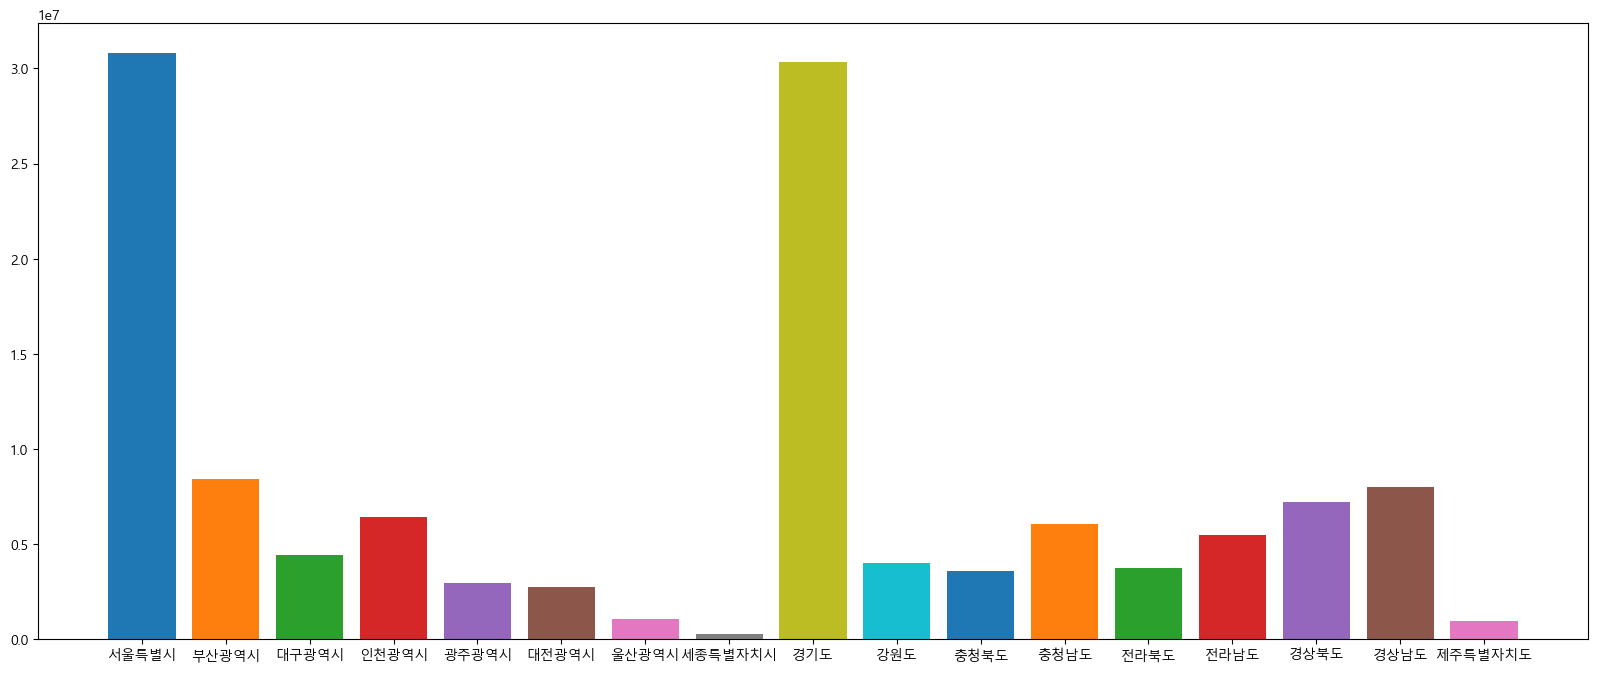

In [295]:
plt.figure(figsize=(20,8))
for idx, val in allCitySR2.items():
    plt.bar(idx, height=val)
plt.show()